# 1주차: Pandas, Matplotlib, Seaborn, Scikit-Learn 맛보기

## 목차
1. Pandas
2. Matplotlib 
3. Seaborn
4. Scikit-Learn

# 1. Pandas 
- 시리즈(Series)와 데이터프레임(DataFrame)을 통해 데이터를 효율적으로 처리하기 위해 만들어진 패키지

In [9]:
# import pandas package
import pandas as pd 

## 시리즈(Series)
- 시리즈(Series)는 데이터 값에 인덱스가 함께 표시되는 클래스이다.

In [10]:
s = pd.Series([41137, 38316, 36625, 31036], index=["혜화", "수유(강북구청)", "충무로", "창동"])
s

혜화          41137
수유(강북구청)    38316
충무로         36625
창동          31036
dtype: int64

- .name과 .index.name을 통해 데이터와 인덱스에 각각 이름을 설정할 수 있다.

In [11]:
s.name = "이용객 수"
s.index.name = "역명"
s

역명
혜화          41137
수유(강북구청)    38316
충무로         36625
창동          31036
Name: 이용객 수, dtype: int64

- 시리즈도 리스트와 같이 인덱싱과 슬라이싱을 할 수 있다.

In [12]:
print(s[1], s["수유(강북구청)"])
print(s[[0, 2]])
type(s[0]) # []사용해 values에 각각 접근 가능

38316 38316
역명
혜화     41137
충무로    36625
Name: 이용객 수, dtype: int64


In [13]:
print(s[(35000 < s) & (s < 40000)])

역명
수유(강북구청)    38316
충무로         36625
Name: 이용객 수, dtype: int64


In [14]:
print(s[1:4])

역명
수유(강북구청)    38316
충무로         36625
창동          31036
Name: 이용객 수, dtype: int64


- 인덱싱을 활용해 딕셔러니처럼 데이터를 추가할 수 있다.

In [15]:
s["미아사거리"] = 29914
s

역명
혜화          41137
수유(강북구청)    38316
충무로         36625
창동          31036
미아사거리       29914
Name: 이용객 수, dtype: int64

## 데이터프레임(DataFrame)
### 데이터프레임 기초
- 데이터프레임(DataFrame)은 데이터 값에 행방향과 열방향 모두의 인덱스가 표시되는 클래스이다.

In [17]:
data = {"202209" :[41137, 38316, 36625, 31036],
        "202208" :[36666, 36244, 29851, 29441],
        "202207" :[37898, 37427, 29587, 30853]}
columns = ["202209", "202208", "202207"]
index=["혜화", "수유(강북구청)", "충무로", "창동"]
df = pd.DataFrame(data, index = index, columns=columns)
df

,202209,202208,202207
혜화,41137,36666,37898
수유(강북구청),38316,36244,37427
충무로,36625,29851,29587
창동,31036,29441,30853


- <code>.values</code> : 데이터만 접근
- <code>.columns</code> : 열방향 인덱스
- <code>.index</code> : 행방향 인덱스

- 데이터프레임의 열 데이터 갱신 혹은 추가 방법은 다음과 같다.

In [18]:
df["202208-09 증가율"] = (df["202209"]-df["202208"])/df["202208"] * 100
df["202207-08 증가율"] = (df["202208"]-df["202207"])/df["202207"] * 100
df

,202209,202208,202207,202208-09 증가율,202207-08 증가율
혜화,41137,36666,37898,12.193858,-3.250831
수유(강북구청),38316,36244,37427,5.716808,-3.160820
충무로,36625,29851,29587,22.692707,0.892284
창동,31036,29441,30853,5.417615,-4.576540


- csv 파일로부터 데이터를 읽어 데이터프레임을 만들 때는 <code>pandas.read_csv()</code> 함수를 사용한다.

In [20]:
netflix_df = pd.read_csv("datasets/netflix_data.csv") 
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


### 인덱싱 및 정렬
**열 인덱싱** : 데이터프레임을 column index를 통해 인덱싱을 할 수 있다. 인덱스로 라벨 값을 하나만 넣으면 시리즈로 반환되므로, 이런 경우에 데이터프레임으로 출력하고 싶을 때는 리스트를 써서 인덱싱을 하면 된다.

In [21]:
netflix_df["title"]

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [22]:
netflix_df[["title"]]


,title
0,3%
1,7:19
2,23:59
3,9
4,21
...,...
7782,Zozo
7783,Zubaan
7784,Zulu Man in Japan
7785,Zumbo's Just Desserts


**행 인덱싱** : 데이터프레임을 행 단위로 인덱싱을 하고자 한다면 슬라이싱을 이용해야 한다.

In [23]:
df[1:2]

,202209,202208,202207,202208-09 증가율,202207-08 증가율
수유(강북구청),38316,36244,37427,5.716808,-3.16082


In [24]:
df["수유(강북구청)":"창동"]

,202209,202208,202207,202208-09 증가율,202207-08 증가율
수유(강북구청),38316,36244,37427,5.716808,-3.160820
충무로,36625,29851,29587,22.692707,0.892284
창동,31036,29441,30853,5.417615,-4.576540


In [25]:
df["202209"]["충무로"] #순서 바꾸면 에러

36625

**.loc 인덱서**

<code>.loc[행 인덱싱값]</code> 혹은 <code>.loc[행 인덱싱값, 열 인덱싱 값]</code>

In [26]:
netflix_df.loc[0:4, "title":"country"]

,title,director,cast,country
0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States


In [28]:
netflix_df.loc[netflix_df.release_year > 2019, ["title", "genre"]]

,title,genre
0,3%,International TV
24,​SAINT SEIYA: Knights of the Zodiac,Anime Series
26,(Un)Well,Reality TV
27,#Alive,Horror Movies
29,#blackAF,TV Comedies
...,...,...
7725,You Cannot Hide,Crime TV
7734,You've Got This,Comedies
7738,Young Wallander,Crime TV
7741,Your Name Engraved Herein,Dramas


**.iloc 인덱서**

iloc은 loc과 달리 라벨이 아니라 정수로 되어 있는 순서 인덱스만을 받는다. 나머지 로직은 loc과 같다.

In [29]:
netflix_df.iloc[0:4, 2:6]

,title,director,cast,country
0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States


**.set_index()** 는 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정한다. (다시 처음으로 되돌리려면 .reset_index()를 사용하면 된다.)

In [30]:
netflix_df.set_index("show_id")

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


**.sort_values()** 는 데이터 값을 기준으로 정렬한다.

In [32]:
netflix_df.sort_values("title", ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3089,s3090,Movie,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,"Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...",NaN,"September 1, 2018",2018,68,"Miniforce, a special task force of elite range...",Children
2929,s2930,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,110,After people in his town start turning up dead...,Dramas
3071,s3072,TV Show,마녀사냥,NaN,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,"February 19, 2018",2015,1,Four Korean celebrity men and guest stars of b...,International TV
2082,s2083,TV Show,海的儿子,NaN,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,"April 27, 2018",2016,1,"Two brothers start a new life in Singapore, wh...",International TV
556,s557,TV Show,忍者ハットリくん,NaN,NaN,Japan,"December 23, 2018",2012,2,"Hailing from the mountains of Iga, Kanzo Hatto...",Anime Series
...,...,...,...,...,...,...,...,...,...,...,...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,105,A teenage hacker with a huge nose helps a cool...,Comedies
32,s33,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,104,As Ayu and Ditto finally transition from best ...,Dramas
31,s32,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,102,"Pining for his high school crush for years, a ...",Dramas
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",2019,95,"Through her diary, Anne Frank's story is retol...",Documentaries


# 2. Matplotlib
- Matplotlib이란 파이썬의 대표적인 데이터 시각화 라이브러리이다.
- 이번 1주차 실습에서는 기본적인 그래프를 그리기 위한 matplotlib의 여러 함수들을 실습한다.
- 그래프를 꾸미기 위한 다양한 함수들은 (폰트 지정, 위치 지정, 테두리 등) 여기서 다루지 않았기 때문에 밑에 있는 링크를 참고하길 바란다.
- Matplotlib Tutorial - 파이썬으로 데이터 시각화하기 : 
https://wikidocs.net/book/5011

## 기본 그래프 그리기
- plot(): 선(line) 또는 마커(marker) 그래프 그리기에 사용되는 함수이다. 함수에 y값을 리스트 형태로 입력하면 꺾은선 그래프가 그려진다.
- show() : 화면에 그래프가 나타나도록 하는 함수.

In [ ]:
import matplotlib.pyplot as plt

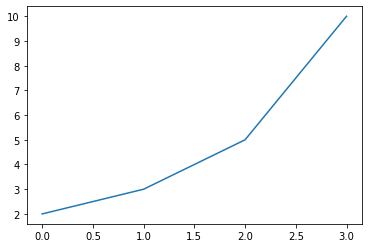

In [5]:
# 예제 1 
# plot() : 하나의 리스트 형태로 값들을 입력하면 y값으로 인식한다. 
# x 값은 기본적으로 [0, 1, 2, 3]이 되어 점 (0, 2), (1, 3), (2, 5), (3, 10)를 잇는 아래와 같은 꺾은선 그래프가 나타난다.

plt.plot([2, 3, 5, 10]) #리스트에 들어있는 값들은 y-values
plt.show()

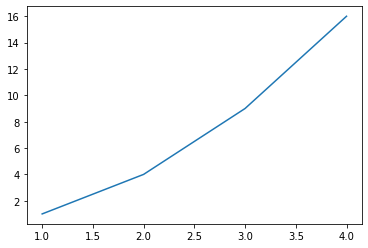

In [3]:
#예제2
# plot() 함수에 두 개의 리스트를 입력하면 순서대로 x, y 값들로 인식해서
# 점 (1, 1), (2, 4), (3, 9), (4, 16)를 잇는 꺾은선 그래프가 나타납니다.

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

## 레이블이 있는 데이터 사용하기
- 파이썬 딕셔너리와 같이 레이블이 있는 데이터를 그래프로 나타낼 수 있다. 
- plot() 함수에 데이터의 레이블(딕셔너리의 키)을 입력
- data 파라미터에 딕셔너리 지정

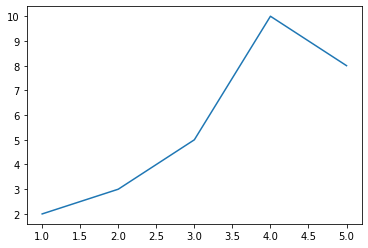

In [2]:
# 예제
import matplotlib.pyplot as plt
data_dict = {'data_x': [1, 2, 3, 4, 5], 'data_y': [2, 3, 5, 10, 8]}

plt.plot('data_x', 'data_y', data=data_dict)
plt.show()

## 축 레이블 설정하기
- xlabel(), ylabel() 함수를 사용하면 그래프의 x, y 축에 대한 레이블을 표시할 수 있다.
- xlabel(), ylabel() 함수에 문자열을 입력하면, 각각의 축에 레이블이 표시된다.

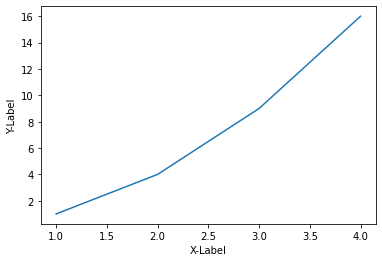

In [2]:
# 예제
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-Label')
plt.ylabel('Y-Label')
plt.show()

## 범례(legend) 표시하기
- 범례(legend)는 그래프에 데이터의 종류를 표시하기 위한 텍스트이다.
- 우선 plot() 함수에 label 문자열을 지정하고,
- matplotlib.pyplot 모듈의 legend() 함수를 호출한다.

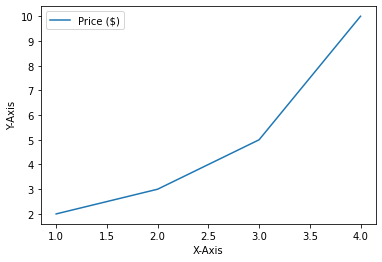

In [6]:
# 예제
plt.plot([1, 2, 3, 4], [2, 3, 5, 10], label='Price ($)')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend() #위에 그래프에 표시됨

plt.show()

## Plot 여러 종류
- Line Plot : <code>.plot()</code>
- Scatter Plot : <code>.scatter()</code>
- Bar Chart : <code>.bar()</code>
- Histogram : <code>.hist()</code>
- Box Plot : <code>.boxplot()</code>
- Pie Chart : <code>.pie()</code>

## Plot 설정(Line Plot 기준)

plt.plot([1, 2, 3], [3, 3, 3], '--', marker='.', color='C0', label='Dashed')

## Plot 기타 설정

- 크기 : <code>plt.figsize</code>
- 제목 : <code>plt.title</code>
- 라벨 : <code>plt.xlabel</code>, <code>plt.ylabel</code>
- 틱 : <code>plt.xticks</code>, <code>plt.yticks</code>
- 범례 : <code>plt.legend</code>
- 축 범위 : <code>plt.axis</code>

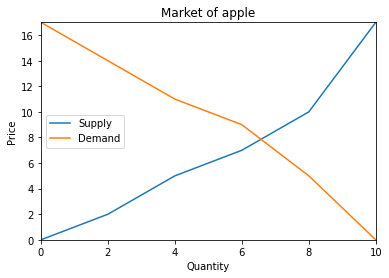

In [7]:
# Matplotlib 정리 예제 : 사과의 수요, 공급 곡선 만들기
# 밑 코드 각 줄마다 각주를 사용하여 코드를 설명해보세요.

data_dict = {'quantity': [0, 2, 4, 6, 8, 10], 'supply': [0, 2, 5, 7, 10, 17], 'demand': [17, 14, 11, 9, 5, 0]}

plt.plot('quantity', 'supply', data=data_dict, label="Supply") 
plt.plot('quantity', 'demand', data=data_dict, label="Demand") 
plt.title('Market of apple') 
plt.xlabel('Quantity') 
plt.ylabel('Price') 
plt.axis([0, 10, 0, 17])
plt.legend()

plt.show()

# 3. Seaborn
- Seaborn은 기본적으로 matplotlib를 베이스로 하며, pandas 데이터 구조를 사용하여 입출력을 받아 연산을 한다.
- Seaborn을 사용할때는 matplotlib와 함께 import 해서 사용한다.
- 이번 실습에서는 seaborn 패키지의 내장데이터인 iris 데이터를 활용하여 그래프를 그리는 연습을 진행한다. 

### seaborn패키지의 load_dataset()함수
- seaborn패키지의 내장데이터를 가져옴

In [34]:
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns
iris = sns.load_dataset("iris")    # 붓꽃 데이터

#### seaborn에서는 다음과 같은 샘플 데이터를 제공한다.
- iris = sns.load_dataset("iris")    # 붓꽃 데이터
- titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
- tips = sns.load_dataset("tips")    # 팁 데이터
-  flights = sns.load_dataset("flights")    # 여객운송 데이터

- iris data의 데이터타입 확인

In [35]:
print(type(iris)) # pandas의 데이터프레임인 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>


- iris data의 데이터 컬럼속성 및 데이터 확인

In [36]:
print(iris.columns) #컬럼 속성 확인

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [37]:
iris.head() #데이터 확인

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## iris data를 pandas와 seaborn 각각 사용하여 산점도로 표현해보자.
### Pandas

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

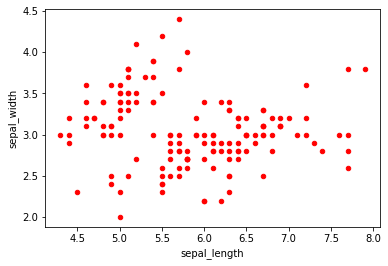

In [38]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',color='red')

### Seaborn

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

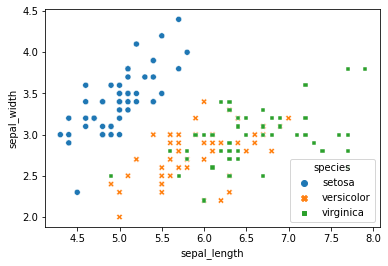

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, style=iris.species,
                     hue=iris.species)
#hue = iris.species

# 4. Scikit-Learn
- 1주차 실습에서는 scikit-learn을 활용한 **붓꽃 데이터 분류** 실습을 진행한다.
- 모델은 교재에서 사용되었던 **k-최근접 이웃 분류 모델**을 활용하여 실습을 진행한다.
- 붓꽃 데이터셋은 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 데이터셋이다.

## k-NN 알고리즘 간단하게 알아보기
- K-최근접 이웃(K-NN, K-Nearest Neighbor) 알고리즘은 가장 간단한 머신러닝 알고리즘으로, 분류(Classification) 알고리즘이다. 
- 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정하에 사용한다.
- 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단하는 알고리즘이 K-NN 알고리즘이다.
- K-NN 알고리즘의 특징 중 하나는 K의 값에 따라 분류가 달라질 수 있다는 점이다.

### (1) 필요한 모듈을 import하고, 데이터를 불러오기.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

### (2) 학습
- n_neighbors parameter : 근접 데이터 수 설정
- fit()으로 classifier을 학습시킨다.

In [51]:
X = df.drop('species', axis=1)
y = df['species']
 
clf = KNeighborsClassifier(n_neighbors=5).fit(X.values, y) 
#n_neighbors k를 의미한다고 보면 됨. (피팅시킴)

### (3) 예측
- predict() : 예측 결과 확인
- score() : 성능 확인
- kneighbors() : 주어진 데이터와 근접한 데이터의 인덱스를 n_neighbors에 지정한 수만큼 알아낼 수 있다.

In [52]:
print(clf.predict(X.values[:1])) ## 첫 번째 학습 데이터의 예측 결과
print(clf.kneighbors(X.values[:1])[1]) ## 주어진 데이터에 5개의 근접 데이터 인덱스
print('정확도 : ', clf.score(X.values, y)) ## 학습 정확도

['setosa']
[[ 0 17  4 39 28]]
정확도 :  0.9666666666666667
